In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [343]:
df = pd.read_csv("/Users/partwalk/Projects/Upgrad/upgrad/Linear Regression/day.csv", date_format="%d-%m-%Y", parse_dates=["dteday"])

In [344]:
df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [345]:
(df['casual'] + df['registered'] == df['cnt']).all()

np.True_

In [346]:
# Since cnt, our target var, is sum of casual and registered, drop those two
# Also dropping instant, which is not a zero-index
# We'll also drop date, since all its info is captured by other columns
df.drop(['casual', 'registered', 'instant', 'dteday'], axis=1, inplace=True)

In [166]:
# Check which columns are null

for x in df.columns:
    if df[x].isnull().all():
        print(x)

In [167]:
# Which columns have a majority null values

for x in df.columns:
    percent_null = (df[x].isnull().sum() * 100) / df.shape[0]
    if percent_null > 50:
        print(x, percent_null)

In [287]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [198]:
def barchart(series, title):
    plt.figure(figsize=(10, 10))
    series.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Total Users per '+title, fontsize=14)
    plt.xlabel(title, fontsize=12)
    plt.ylabel('Total Users', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig('./count_per_'+title.lower().replace(' ','_')+'.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

In [347]:
# For clarity during EDA
season_order = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
month_order = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
weather_order = {1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow'}
weekday_order = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}

df['season'] = df.season.map(season_order)
df['season'] = pd.Categorical(df['season'], categories=list(season_order.values()), ordered=True)

df['mnth'] = df.mnth.map(month_order)
df['mnth'] = pd.Categorical(df['mnth'], categories=list(month_order.values()), ordered=True)

df['weathersit'] = df.weathersit.map(weather_order)
df['weathersit'] = pd.Categorical(df['weathersit'], categories=list(weather_order.values()), ordered=True)

df['weekday'] = df.weekday.map(weekday_order)
df['weekday'] = pd.Categorical(df['weekday'], categories=list(weekday_order.values()), ordered=True)



In [290]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [245]:
df.groupby('weathersit')['cnt'].sum()

weathersit
Clear            2257952
Mist + Cloudy     995024
Light Snow         37869
Heavy Rain             0
Name: cnt, dtype: int64

"Clear" is by far most popular, and 'cnt' fall off precipitously after that.

In [246]:
df.groupby('season')['cnt'].sum()

season
spring     469514
summer     918589
fall      1061129
winter     841613
Name: cnt, dtype: int64

"Fall", closely followed by "Summer", are most popular. Spring is extremely unpopular

In [247]:
df.groupby('mnth')['cnt'].sum()

mnth
Jan    134933
Feb    149518
Mar    228920
Apr    269094
May    331686
Jun    346342
Jul    344948
Aug    351194
Sep    345991
Oct    322352
Nov    254831
Dec    211036
Name: cnt, dtype: int64

As above, the fall and summer months have higher number of users

In [248]:
df.groupby('weekday')['cnt'].sum()

weekday
Sun    444027
Mon    455503
Tue    469109
Wed    471214
Thu    485395
Fri    487790
Sat    477807
Name: cnt, dtype: int64

In [ ]:
barchart(df.groupby('season')['cnt'].sum(), "Season")

<Axes: xlabel='holiday', ylabel='cnt'>

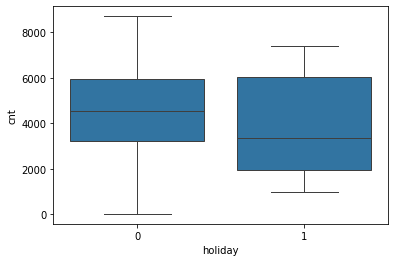

In [266]:
sns.boxplot(x='holiday', y='cnt', data=df)

<Axes: xlabel='workingday', ylabel='cnt'>

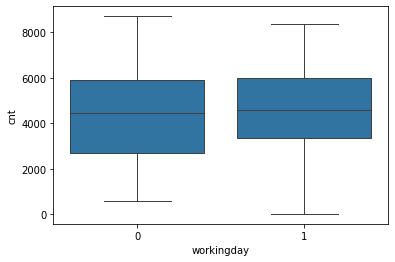

In [267]:
sns.boxplot(x='workingday', y='cnt', data=df)

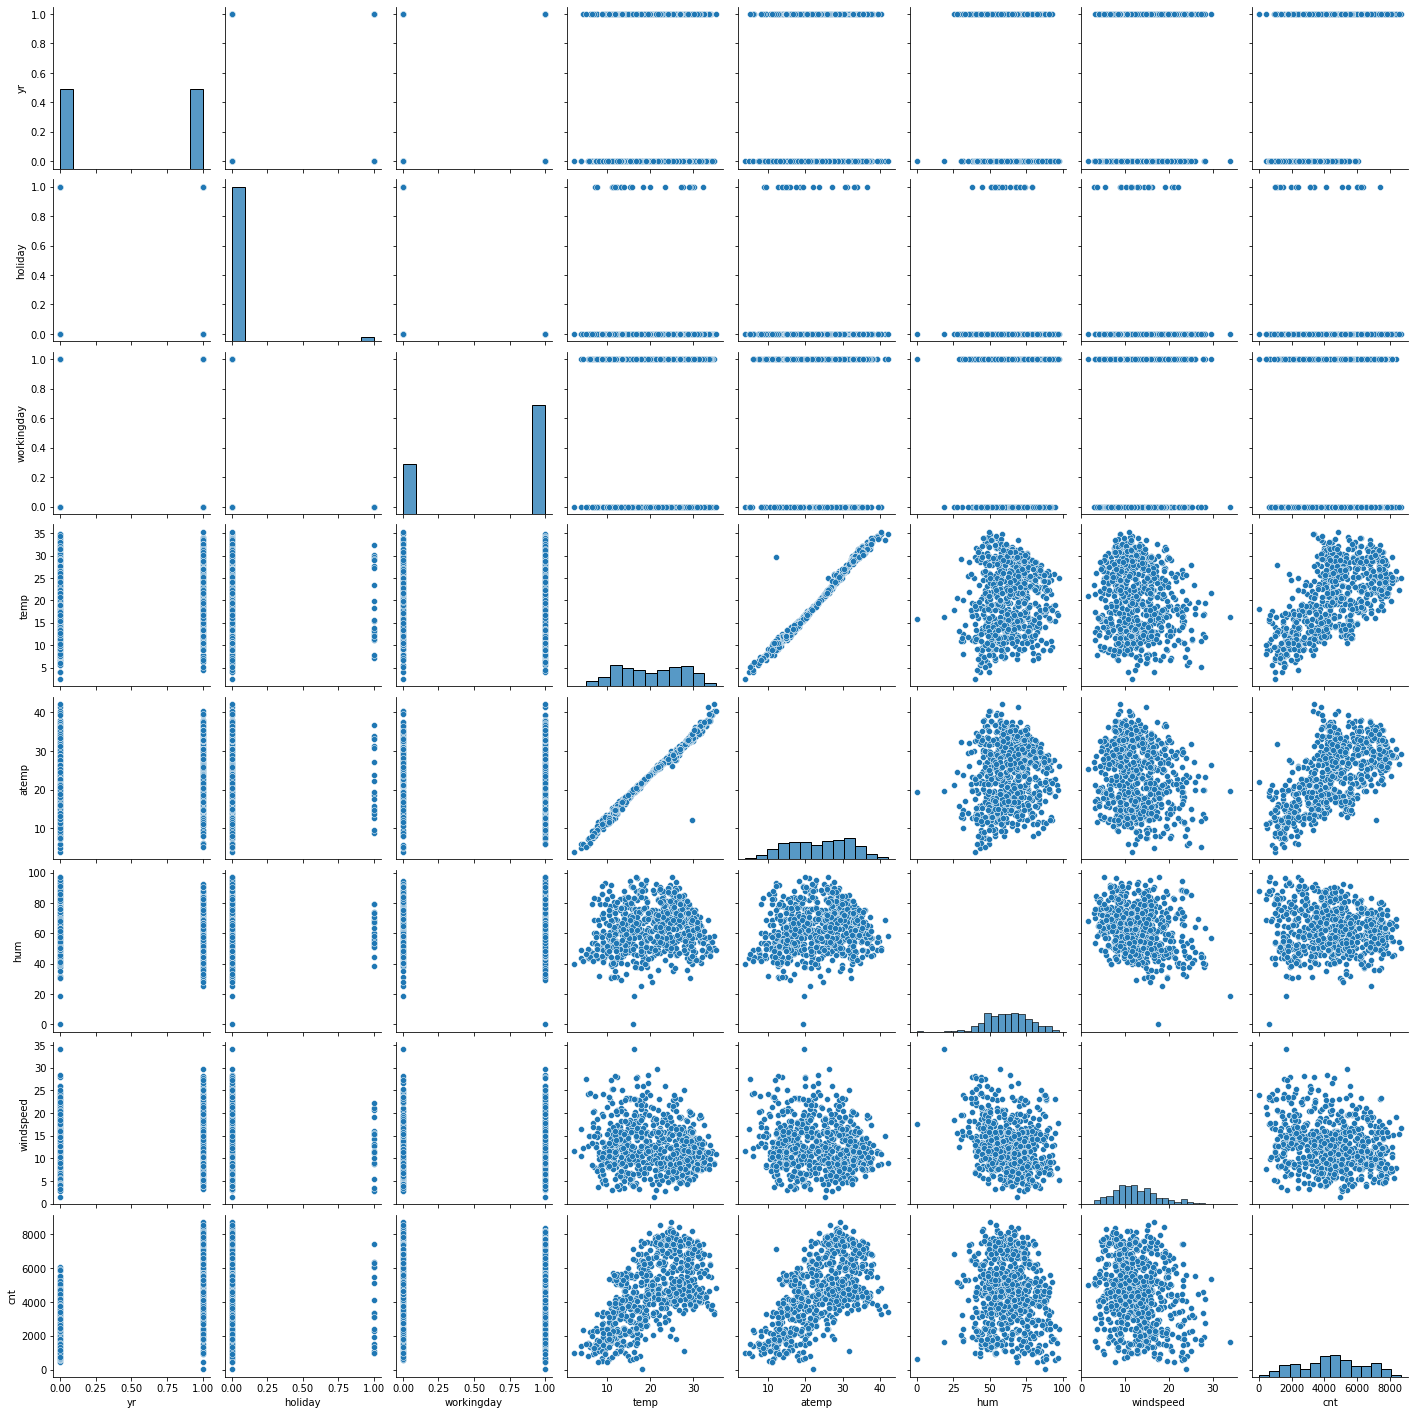

In [308]:
sns.pairplot(df, vars=['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

We can see that 'cnt' is positively correlated with 'temp' and 'atemp'. 'temp' and 'atemp' are themselves very correlated, so we'll drop one of them.

'hum' and 'windspeed' don't seem to have a clear correlation. 'hum' could be slightly positively correlated.

'yr' is positively correlated. This is as expected. The demand for bikeride apps is rising, and we expect it to continue to rise.

Hard to say anything for 'holiday' since there's so few holidays. Same for 'workingday'

In [351]:
# We'll drop 'atemp' as it is multicollinear with 'temp'. 
# 'atemp' depends on temp, windspeed and humidity, which already exist in the data. 

df.drop('atemp', axis=1, inplace=True)

In [348]:
# Creating dummy variables

season = pd.get_dummies(df['season'], drop_first=True, dtype=int)
month = pd.get_dummies(df['mnth'], drop_first=True, dtype=int)
weekday = pd.get_dummies(df['weekday'], drop_first=True, dtype=int)
weather = pd.get_dummies(df['weathersit'], drop_first=True, dtype=int)


In [350]:
df = pd.concat([df, season, month, weekday, weather], axis = 1)
df.drop(['mnth', 'weekday', 'season', 'weathersit'], inplace=True, axis=1)

In [352]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist + Cloudy,Light Snow
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [437]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [404]:
df_train.shape

(510, 29)

In [438]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [439]:
scale_columns = ['temp','hum','windspeed','cnt']

df_train[scale_columns] = scaler.fit_transform(df_train[scale_columns])

In [440]:
df_train[scale_columns].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


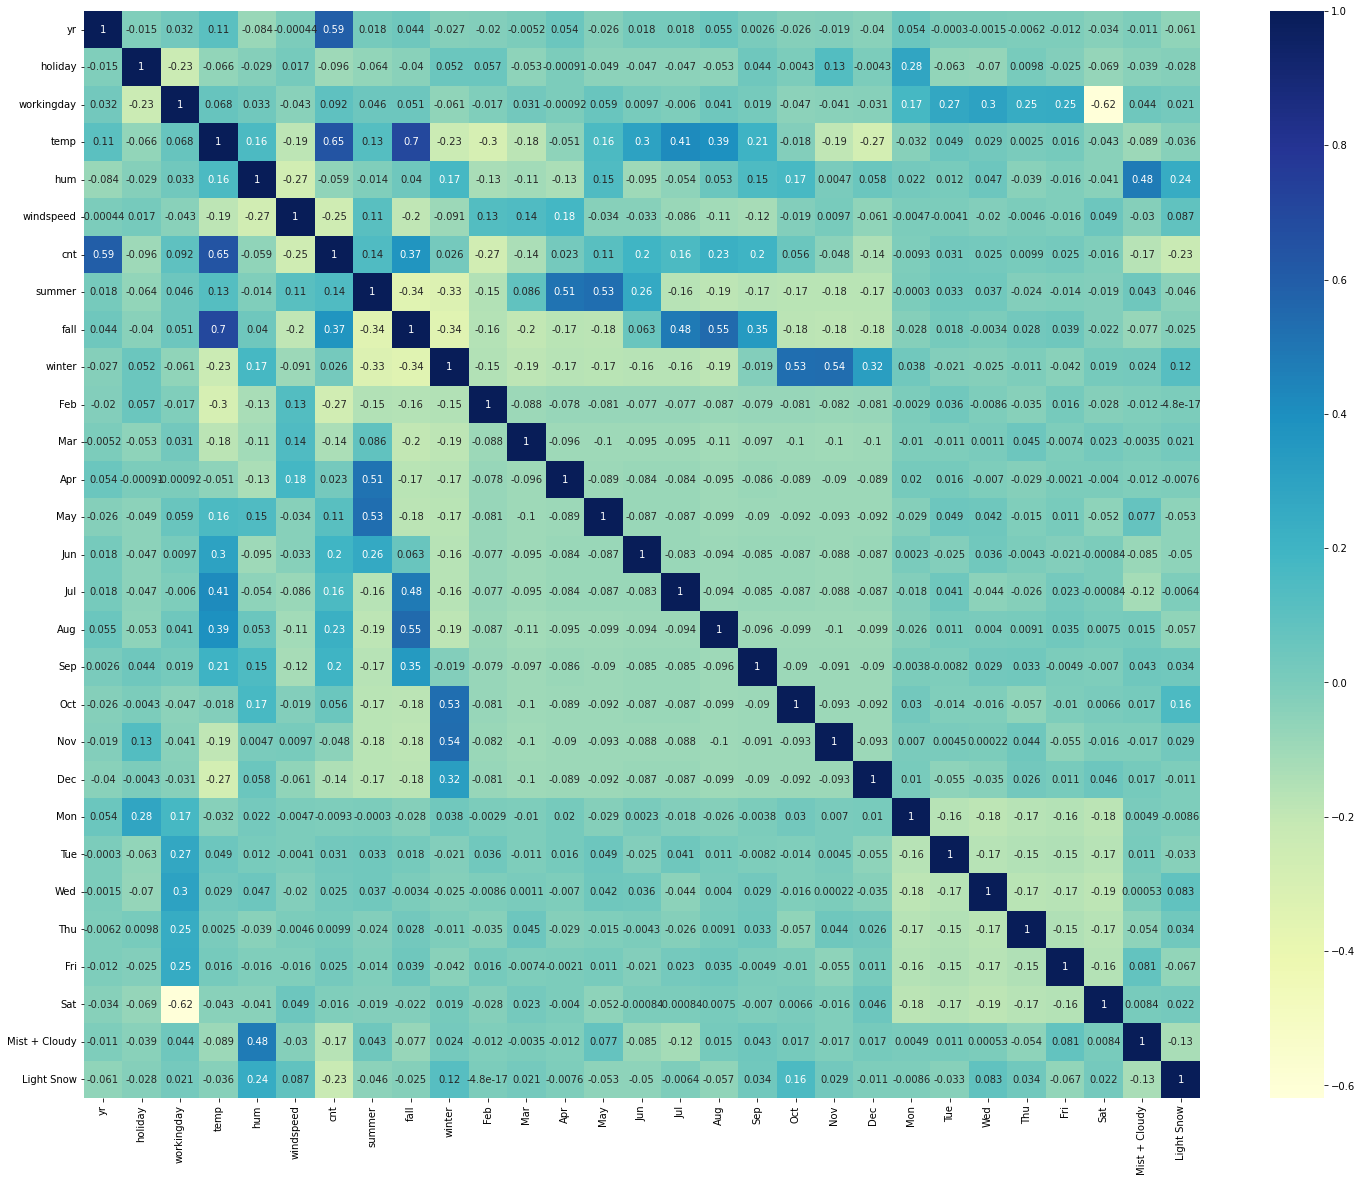

In [358]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu', )
plt.show()

In [441]:
y_train = df_train.pop('cnt')
x_train = df_train

We have 29 variables. We'll use RFE first.

In [389]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [442]:
lr = LinearRegression()
lr.fit(x_train, y_train)

rfe = RFE(lr)
rfe = rfe.fit(x_train, y_train)


In [443]:
pd.DataFrame(zip(x_train.columns,rfe.support_,rfe.ranking_))


,0,1,2
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,True,1
4,hum,True,1
5,windspeed,True,1
6,summer,False,2
7,fall,False,15
8,winter,True,1
9,Feb,False,14


In [445]:
rfe_true = x_train.columns[rfe.support_]
rfe_true


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'Sep', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Light Snow'],
      dtype='object')

In [452]:
x_train_sm = sm.add_constant(x_train[rfe_true])
lr = sm.OLS(y_train, x_train_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.42e-167
Time:                        21:57:29   Log-Likelihood:                 458.15
No. Observations:                 510   AIC:                            -888.3
Df Residuals:                     496   BIC:                            -829.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.892      0.000       0.200       0.313
yr             0.2271      0.009     25.300      0.000       0.210       0.245
holiday       -0.0742      0.025     -2.915      0.004      -0.124      -0.024
workingday     0.0258      0.009      3.023      0.003       0.009       0.043
temp           0.6082      0.021     28.342      0.000       0.566       0.650
hum           -0.2550      0.034     -7.523      0.000      -0.322      -0.188
windspeed     -0.1778      0.028     -6.365      0.000      -0.233      -0.123
winter         0.1170      0.011     10.712      0.000       0.096       0.138
Sep            0.0769      0.017      4.564      0.000       0.044       0.110
Mon           -0.0162      0.011     -1.517      0.130      -0.037       0.005
Tue           -0.0154      0.012     -1.256      0.210      -0.040       0.009
Wed           -0.0019      0.012     -0.163      0.871      -0.025       0.021
Thu           -0.0088      0.012     -0.739      0.461      -0.032       0.015
Fri           -0.0061      0.012     -0.495      0.621      -0.030       0.018
Light Snow    -0.2045      0.028     -7.386      0.000      -0.259      -0.150
==============================================================================
Omnibus:                       35.064   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.656
Skew:                          -0.451   Prob(JB):                     2.48e-14
Kurtosis:                       4.462   Cond. No.                     5.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [453]:
vif = pd.DataFrame()
vif['Features'] = rfe_true
vif['VIF'] = [variance_inflation_factor(x_train[rfe_true].values, i) for i in range(x_train[rfe_true].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,Mon,inf
9,Tue,inf
10,Wed,inf
11,Thu,inf
12,Fri,inf
4,hum,10.78
3,temp,7.14
5,windspeed,3.53


'Mon', 'Tue', 'Wed', 'Thu', 'Fri' have a high p-value and high VIF.
Let's drop 'Wed' first

In [454]:
x_train_1 = x_train[rfe_true].drop('Wed', axis=1)
x_train_1_sm = sm.add_constant(x_train_1)
lr = sm.OLS(y_train, x_train_1_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.42e-167
Time:                        21:57:53   Log-Likelihood:                 458.15
No. Observations:                 510   AIC:                            -888.3
Df Residuals:                     496   BIC:                            -829.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.892      0.000       0.200       0.313
yr             0.2271      0.009     25.300      0.000       0.210       0.245
holiday       -0.0761      0.032     -2.343      0.020      -0.140      -0.012
workingday     0.0239      0.014      1.732      0.084      -0.003       0.051
temp           0.6082      0.021     28.342      0.000       0.566       0.650
hum           -0.2550      0.034     -7.523      0.000      -0.322      -0.188
windspeed     -0.1778      0.028     -6.365      0.000      -0.233      -0.123
winter         0.1170      0.011     10.712      0.000       0.096       0.138
Sep            0.0769      0.017      4.564      0.000       0.044       0.110
Mon           -0.0143      0.016     -0.874      0.382      -0.047       0.018
Tue           -0.0135      0.017     -0.818      0.414      -0.046       0.019
Thu           -0.0069      0.016     -0.420      0.675      -0.039       0.025
Fri           -0.0042      0.017     -0.250      0.802      -0.037       0.029
Light Snow    -0.2045      0.028     -7.386      0.000      -0.259      -0.150
==============================================================================
Omnibus:                       35.064   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.656
Skew:                          -0.451   Prob(JB):                     2.48e-14
Kurtosis:                       4.462   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value did not drop

In [455]:
vif = pd.DataFrame()
vif['Features'] = x_train_1.columns
vif['VIF'] = [variance_inflation_factor(x_train_1.values, i) for i in range(x_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.78
3,temp,7.14
2,workingday,6.45
5,windspeed,3.53
8,Mon,2.08
0,yr,2.03
10,Thu,1.85
9,Tue,1.84
11,Fri,1.82
6,winter,1.49


The p-value of 'Fri' increased. We'll drop that next.

In [456]:
x_train_2 = x_train_1.drop('Fri', axis=1)
x_train_2_sm = sm.add_constant(x_train_2)
lr = sm.OLS(y_train, x_train_2_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.09e-168
Time:                        21:58:44   Log-Likelihood:                 458.12
No. Observations:                 510   AIC:                            -890.2
Df Residuals:                     497   BIC:                            -835.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.029      8.898      0.000       0.200       0.313
yr             0.2272      0.009     25.329      0.000       0.210       0.245
holiday       -0.0781      0.031     -2.489      0.013      -0.140      -0.016
workingday     0.0221      0.012      1.900      0.058      -0.001       0.045
temp           0.6082      0.021     28.369      0.000       0.566       0.650
hum           -0.2549      0.034     -7.527      0.000      -0.321      -0.188
windspeed     -0.1779      0.028     -6.372      0.000      -0.233      -0.123
winter         0.1170      0.011     10.722      0.000       0.096       0.138
Sep            0.0770      0.017      4.573      0.000       0.044       0.110
Mon           -0.0125      0.015     -0.856      0.393      -0.041       0.016
Tue           -0.0117      0.015     -0.791      0.429      -0.041       0.017
Thu           -0.0051      0.015     -0.344      0.731      -0.034       0.024
Light Snow    -0.2039      0.028     -7.400      0.000      -0.258      -0.150
==============================================================================
Omnibus:                       35.457   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.133
Skew:                          -0.456   Prob(JB):                     1.95e-14
Kurtosis:                       4.462   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, the R-squared did not drop.

In [457]:
vif = pd.DataFrame()
vif['Features'] = x_train_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_2.values, i) for i in range(x_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.78
3,temp,7.14
2,workingday,4.50
5,windspeed,3.53
0,yr,2.03
8,Mon,1.64
6,winter,1.49
10,Thu,1.47
9,Tue,1.46
1,holiday,1.27


The p-value of Thu increased. We'll drop that next.

In [458]:
x_train_3 = x_train_2.drop('Thu', axis=1)
x_train_3_sm = sm.add_constant(x_train_3)
lr = sm.OLS(y_train, x_train_3_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          8.20e-170
Time:                        22:01:19   Log-Likelihood:                 458.06
No. Observations:                 510   AIC:                            -892.1
Df Residuals:                     498   BIC:                            -841.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2559      0.029      8.899      0.000       0.199       0.312
yr             0.2272      0.009     25.352      0.000       0.210       0.245
holiday       -0.0802      0.031     -2.602      0.010      -0.141      -0.020
workingday     0.0205      0.011      1.925      0.055      -0.000       0.041
temp           0.6082      0.021     28.396      0.000       0.566       0.650
hum           -0.2544      0.034     -7.526      0.000      -0.321      -0.188
windspeed     -0.1778      0.028     -6.376      0.000      -0.233      -0.123
winter         0.1170      0.011     10.727      0.000       0.096       0.138
Sep            0.0768      0.017      4.571      0.000       0.044       0.110
Mon           -0.0108      0.014     -0.787      0.432      -0.038       0.016
Tue           -0.0101      0.014     -0.720      0.472      -0.038       0.017
Light Snow    -0.2042      0.028     -7.419      0.000      -0.258      -0.150
==============================================================================
Omnibus:                       35.582   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.072
Skew:                          -0.459   Prob(JB):                     2.01e-14
Kurtosis:                       4.457   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:
vif = pd.DataFrame()
vif['Features'] = x_train_3.columns
vif['VIF'] = [variance_inflation_factor(x_train_3.values, i) for i in range(x_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.77
3,temp,7.13
2,workingday,3.73
5,windspeed,3.53
0,yr,2.03
6,winter,1.49
8,Mon,1.46
9,Tue,1.32
1,holiday,1.22
7,Sep,1.16


The p-values greater than 0.5 are now gone. Still, Mon and Tue have high p-values. Let's drop 'Tue' next.

In [460]:
x_train_4 = x_train_3.drop('Tue', axis=1)
x_train_4_sm = sm.add_constant(x_train_4)
lr = sm.OLS(y_train, x_train_4_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          7.17e-171
Time:                        22:04:00   Log-Likelihood:                 457.79
No. Observations:                 510   AIC:                            -893.6
Df Residuals:                     499   BIC:                            -847.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2566      0.029      8.934      0.000       0.200       0.313
yr             0.2272      0.009     25.364      0.000       0.210       0.245
holiday       -0.0820      0.031     -2.672      0.008      -0.142      -0.022
workingday     0.0180      0.010      1.790      0.074      -0.002       0.038
temp           0.6077      0.021     28.401      0.000       0.566       0.650
hum           -0.2549      0.034     -7.548      0.000      -0.321      -0.189
windspeed     -0.1783      0.028     -6.396      0.000      -0.233      -0.124
winter         0.1168      0.011     10.723      0.000       0.095       0.138
Sep            0.0772      0.017      4.593      0.000       0.044       0.110
Mon           -0.0085      0.013     -0.635      0.526      -0.035       0.018
Light Snow    -0.2032      0.027     -7.397      0.000      -0.257      -0.149
==============================================================================
Omnibus:                       35.338   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.557
Skew:                          -0.452   Prob(JB):                     1.58e-14
Kurtosis:                       4.475   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [461]:
vif = pd.DataFrame()
vif['Features'] = x_train_4.columns
vif['VIF'] = [variance_inflation_factor(x_train_4.values, i) for i in range(x_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.77
3,temp,7.13
5,windspeed,3.53
2,workingday,3.35
0,yr,2.03
6,winter,1.49
8,Mon,1.38
1,holiday,1.22
7,Sep,1.16
9,Light Snow,1.09


Now we'll drop Mon from the model.

In [463]:
x_train_5 = x_train_4.drop('Mon', axis=1)
x_train_5_sm = sm.add_constant(x_train_5)
lr = sm.OLS(y_train, x_train_5_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     231.4
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.60e-172
Time:                        22:05:21   Log-Likelihood:                 457.58
No. Observations:                 510   AIC:                            -895.2
Df Residuals:                     500   BIC:                            -852.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2571      0.029      8.961      0.000       0.201       0.313
yr             0.2268      0.009     25.387      0.000       0.209       0.244
holiday       -0.0885      0.029     -3.060      0.002      -0.145      -0.032
workingday     0.0164      0.010      1.684      0.093      -0.003       0.036
temp           0.6081      0.021     28.446      0.000       0.566       0.650
hum           -0.2557      0.034     -7.580      0.000      -0.322      -0.189
windspeed     -0.1784      0.028     -6.404      0.000      -0.233      -0.124
winter         0.1167      0.011     10.716      0.000       0.095       0.138
Sep            0.0774      0.017      4.612      0.000       0.044       0.110
Light Snow    -0.2030      0.027     -7.393      0.000      -0.257      -0.149
==============================================================================
Omnibus:                       34.700   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.884
Skew:                          -0.442   Prob(JB):                     2.21e-14
Kurtosis:                       4.476   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [464]:
vif = pd.DataFrame()
vif['Features'] = x_train_5.columns
vif['VIF'] = [variance_inflation_factor(x_train_5.values, i) for i in range(x_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.76
3,temp,7.12
5,windspeed,3.53
2,workingday,3.13
0,yr,2.02
6,winter,1.49
7,Sep,1.16
8,Light Snow,1.09
1,holiday,1.08


In [474]:
x_train_6 = x_train_5.drop('workingday', axis=1)
x_train_6_sm = sm.add_constant(x_train_6)
lr = sm.OLS(y_train, x_train_6_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.38e-172
Time:                        22:21:13   Log-Likelihood:                 456.14
No. Observations:                 510   AIC:                            -894.3
Df Residuals:                     501   BIC:                            -856.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2679      0.028      9.560      0.000       0.213       0.323
yr             0.2272      0.009     25.396      0.000       0.210       0.245
holiday       -0.0996      0.028     -3.531      0.000      -0.155      -0.044
temp           0.6091      0.021     28.447      0.000       0.567       0.651
hum           -0.2548      0.034     -7.542      0.000      -0.321      -0.188
windspeed     -0.1799      0.028     -6.451      0.000      -0.235      -0.125
winter         0.1158      0.011     10.628      0.000       0.094       0.137
Sep            0.0778      0.017      4.630      0.000       0.045       0.111
Light Snow    -0.2020      0.027     -7.345      0.000      -0.256      -0.148
==============================================================================
Omnibus:                       39.058   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.093
Skew:                          -0.510   Prob(JB):                     2.70e-15
Kurtosis:                       4.455   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [470]:
vif = pd.DataFrame()
vif['Features'] = x_train_6.columns
vif['VIF'] = [variance_inflation_factor(x_train_6.values, i) for i in range(x_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.83
2,temp,7.04
4,windspeed,3.48
0,yr,2.01
5,winter,1.49
6,Sep,1.16
7,Light Snow,1.09
1,holiday,1.03


In [486]:
x_train_7 = x_train_6.drop('hum', axis=1)
x_train_7_sm = sm.add_constant(x_train_7)
lr = sm.OLS(y_train, x_train_7_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.80e-162
Time:                        22:30:27   Log-Likelihood:                 428.72
No. Observations:                 510   AIC:                            -841.4
Df Residuals:                     502   BIC:                            -807.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1013      0.018      5.573      0.000       0.066       0.137
yr             0.2333      0.009     24.831      0.000       0.215       0.252
holiday       -0.0944      0.030     -3.177      0.002      -0.153      -0.036
temp           0.5850      0.022     26.212      0.000       0.541       0.629
windspeed     -0.1284      0.029     -4.505      0.000      -0.184      -0.072
winter         0.1021      0.011      9.014      0.000       0.080       0.124
Sep            0.0656      0.018      3.720      0.000       0.031       0.100
Light Snow    -0.2555      0.028     -9.125      0.000      -0.311      -0.201
==============================================================================
Omnibus:                       39.160   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.197
Skew:                          -0.556   Prob(JB):                     1.40e-13
Kurtosis:                       4.245   Cond. No.                         9.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [487]:
vif = pd.DataFrame()
vif['Features'] = x_train_7.columns
vif['VIF'] = [variance_inflation_factor(x_train_7.values, i) for i in range(x_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.34
3,windspeed,2.85
0,yr,2.00
4,winter,1.24
5,Sep,1.15
6,Light Snow,1.06
1,holiday,1.03


Our model is complete.

In [489]:
y_train_pred = model.predict(x_train_7_sm)

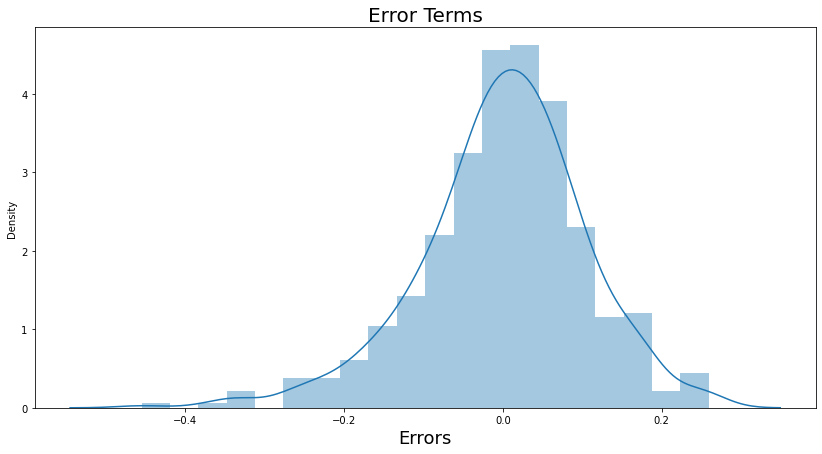

In [506]:
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

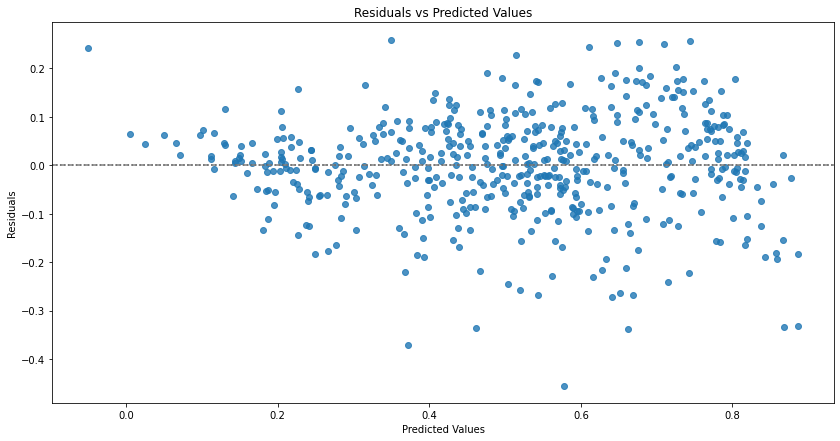

In [503]:
plt.figure(figsize=(14, 7))
sns.residplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='grey', linestyle='--')
plt.show()

In [ ]:
df_test[scale_columns] = scaler.transform(df_test[scale_columns])

In [481]:
y_test = df_test.pop('cnt')
x_test = df_test
x_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Feb,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist + Cloudy,Light Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.263636,0.245455,0.236364,0.100000,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.441609,0.431338,0.425817,0.300684,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [492]:
x_test_new = x_test[x_train_7.columns]

x_test_new_sm = sm.add_constant(x_test_new)
y_test_pred = model.predict(x_test_new_sm)


In [493]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7537940334242023